# Final Project 

By Ashley Snell, Jeremy Taylor, Sydney Small



## Content Knowledge:


Sydney Content Knowledge- Where is data set from and what do the features mean

The question we were aiming to answer was based off the personality scores and other important characteristics of an individual, can we predict if they are a Cannabis user or not. This would be a classification problem as we are trying to classify people. 
This research is important because it could help predict if individuals are at risk of future drug use.

This could be considered unethical if misused and if the algorithm is not exactly perfect, by using a personality test to accuse people of drug use/potential future use.  

In [5]:
import pandas as pa
import numpy as np
import numpy.random as rn
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as pltco

druguser = pa.read_csv("drug_consumption.csv", names = ['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannabis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroin',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA'])

druguser.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## Data Manipluation: 


In [6]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':1,'CL5':1,'CL6':1,0:0, 1:1} #only counting people who used in last month as users.
druguser.Cannabis = druguser.Cannabis.map(names)
druguser.Semer = druguser.Semer.map(names)
druguser.Nicotine = druguser.Nicotine.map(names)
druguser.LSD = druguser.LSD.map(names)
druguser.Mushrooms = druguser.Mushrooms.map(names)
druguser.Ecstasy = druguser.Ecstasy.map(names)
druguser.Coke = druguser.Coke.map(names)
druguser.Alcohol = druguser.Alcohol.map(names)

Here we are classifying the data into Users and Non Users (two classes vs seven), with Users being within the last month. This is how we engineered the features from the original data set.

In [7]:
def plot_cat_model(clf, X, y):
 
    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    clf.fit(X_train, y_train) # Fit the model

    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),
        np.linspace(y_min, y_max, nn))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

This is a general plot cat model to plot the two variable results throughout the data/tests.

In [8]:
def Bootstrap(clf2, X, y):
    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    num = 50 
    Xboot = [0]*num
    yboot = [0]*num

    n = X.shape[0]
    for s in range(num):
        sample = np.random.randint(0, n, n) 
        Xboot[s] = X[sample, :]
        yboot[s] = y[sample]

    test = int(0.20*n)

    labels = ['train','test']

    Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

    for s in range(num):
        X_test = Xboot[s][:test]
        y_test = yboot[s][:test]
        X_train = Xboot[s][test:]
        y_train = yboot[s][test:]
    
        clf2.fit(X_train, y_train)
        Error.iloc[s, 0] = clf2.score(X_train, y_train) 
        Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
    Error_mean = [0]*2
    Error_std = [0]*2
    for c in range(2):
        Error_mean[c] = np.mean(Error.iloc[:num, c])
        Error_std[c] = np.std(Error.iloc[:num, c])
    
    Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
    Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
    Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
    print(Error.tail())
   

Jeremy created a Bootstrap command instead of having to code it individually every time for every test.

In [9]:
def plot_feature_importances(model, names, tol=10**-3):
    n_features = len(names)
    plot_names = []
    plot_importances = []
    
    for k in range(n_features):
        if model.feature_importances_[k] > tol:
            plot_names += [ names[k] ]
            plot_importances += [ model.feature_importances_[k] ]
    
    n_plot = len(plot_names)
    
    plt.figure(figsize = (10, 6))
    plt.barh(range(n_plot), plot_importances, align = 'center')
    plt.yticks(np.arange(n_plot), plot_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_plot)

This plots feature importance for the Decision Tree model.

## Logistic Regression:


We implemented Logistic regression to further solidify what type of problem we would be answering.

In [10]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

We picked Age and Education as the two features to test with based off of content knowledge, thinking these would have a large impact on the data.

In [11]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression(solver='lbfgs')
lgreg.fit(X_train[:,1].reshape(-1,1), y_train);

In [12]:
b, m = *lgreg.intercept_, *lgreg.coef_[0]
b, m

(-0.3744082172450093, -0.5938031459964119)

Logistic Regression Decsion Intercept -0.3744082172450093
Logistic Regression Coefficent -0.5938031459964119


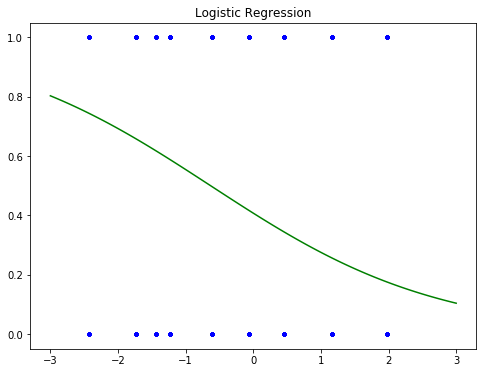

In [13]:
plt.figure(figsize = (8, 6))
plt.plot(X_train[:,1], y_train, 'b.')
xx = np.linspace(-3, 3, 100)
yy = np.exp(m*xx+b)/(1 + np.exp(m*xx+b))
plt.plot(xx, yy, 'g-');
plt.title ("Logistic Regression")
print("Logistic Regression Decsion Intercept",b)
print("Logistic Regression Coefficent",m)

Logistic regression clearly does not work, shown by this curved graph. When we attempted PCA analysis, the results were just as useless and unapplicable.

In [14]:
keep = ['Age', 'Country', 'Education', 'Gender', 'Ascore', 
         'Cscore', 'Escore', 'Nscore', 'Oscore', 'Ethnicity','Impulsive','SS']
X = np.array(druguser[ keep])
y = np.array(druguser['Cannabis'])
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()
# Creation of keep

In [15]:
lgreg.fit(X_train[:,1].reshape(-1,1), y_train);
b, m = *lgreg.intercept_, *lgreg.coef_[0]
print("Logistic Regression Decsion Intercept",b)
print("Logistic Regression Coefficent",m)

Logistic Regression Decsion Intercept -0.3744082172450093
Logistic Regression Coefficent -0.5938031459964119


Logistic Regression for the keep! Unable to graph due to how many features are within. This provided even worse results than the above graph showed.

## K-Nearest Neighbors

We then decided to use K-nearest neighbors because it is a more flexible model and less restricted by linearity. We continued to use the same two features we believed had the highest importance.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Knear = KNeighborsClassifier(n_neighbors=100) # Define the model
Knear.fit(X_train, y_train); # Train the model


Training Error: 0.7274535809018567
Testing Error: 0.7188328912466844


Text(0.5, 1.0, 'K-Nearest Neighbors')

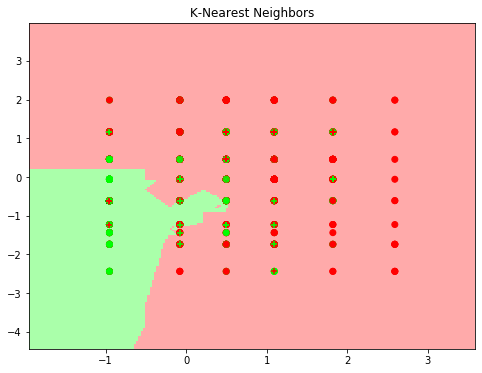

In [18]:
plot_cat_model(Knear,X,y)
plt.title ("K-Nearest Neighbors")

Visual for K-Nearest.

In [20]:
X = np.array(druguser[ keep])
y = np.array(druguser[['Cannabis']]).reshape(-1)

num = 10 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)
maxk = 20

labels = [ ['train_{}'.format(x), 'test_{}'.format(x)] for x in range(1, maxk+1)]
labels = [x for sublist in labels for x in sublist]

Error = pa.DataFrame(  np.array([0]*num*2*maxk).reshape(num, 2*maxk), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    for k in range(maxk):
        clf = KNeighborsClassifier(n_neighbors=k+1) 
        clf.fit(X_train, y_train) 
        Error.iloc[s, 2*k] = clf.score(X_train, y_train) 
        Error.iloc[s, 2*k+1] = clf.score(X_test, y_test)
      
Error_mean = [0]*2*maxk
Error_std = [0]*2*maxk
for c in range(2*maxk):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()

,train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4,train_5,test_5,...,train_16,test_16,train_17,test_17,train_18,test_18,train_19,test_19,train_20,test_20
7,1.0,0.856764,0.934350,0.811671,0.930371,0.793103,0.891247,0.798408,0.879973,0.806366,...,0.828249,0.824934,0.820292,0.824934,0.811008,0.819629,0.814324,0.822281,0.816313,0.822281
8,1.0,0.875332,0.935013,0.824934,0.926393,0.803714,0.882626,0.782493,0.877984,0.798408,...,0.832228,0.803714,0.832228,0.806366,0.832228,0.801061,0.826923,0.795756,0.823607,0.795756
9,1.0,0.893899,0.935676,0.846154,0.915782,0.843501,0.884615,0.862069,0.872679,0.880637,...,0.814987,0.819629,0.819629,0.822281,0.816313,0.827586,0.810345,0.814324,0.812997,0.819629
Mean,1.0,0.878249,0.933422,0.821220,0.915716,0.813793,0.876260,0.797878,0.868899,0.807162,...,0.819828,0.795756,0.819231,0.796817,0.815915,0.796817,0.816512,0.800531,0.816578,0.799469
Standard Deviation,0.0,0.013444,0.003948,0.015247,0.006654,0.018484,0.008171,0.024507,0.007391,0.029467,...,0.009683,0.025164,0.008606,0.023282,0.010149,0.025198,0.009073,0.018293,0.008693,0.019245


This was selecting for the optimal amount of neighbors.

Text(0.5, 1.0, 'Difference Between Training and Testing Errors')

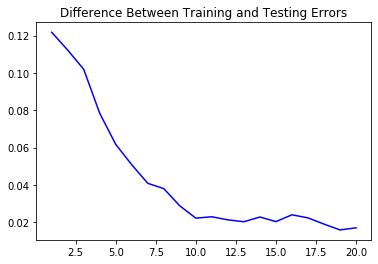

In [22]:
testing_error = np.array(Error_mean[1::2])
training_error = np.array(Error_mean[0::2])
s = abs(testing_error - training_error)
kk = range(1, maxk+1)
plt.plot(kk, s, 'b-');
plt.title ("Difference Between Training and Testing Errors")

Text(0.5, 1.0, 'Testing Error vs K Value')

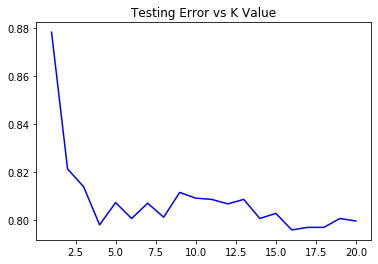

In [23]:
testing_error = Error_mean[1::2]
kk = range(1, maxk+1)
plt.plot(kk, testing_error, 'b-');
plt.title ("Testing Error vs K Value")

With this informationm, we decided the optimum amount of neighbors is 19. We bootstrapped with that amount.

In [25]:
clf = KNeighborsClassifier(19)
Bootstrap(clf, X, y)

                       train      test
47                  0.840849  0.816976
48                  0.811671  0.824934
49                  0.807029  0.806366
Mean                0.818183  0.796074
Standard Deviation  0.010589  0.022285


This did far better than Logistic. There is slight evidence of overfitting. We still need a better, more flexible model.

# Quadratic Discriminant Analysis

We decided to go with this model even though it is less flexible and less linear. We wanted to try and fit our data set problem but reduce the problem of overfitting at the same time.

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Training Error: 0.7314323607427056
Testing Error: 0.7480106100795756


Text(0.5, 1.0, 'Quadratic Discriminant Analysis')

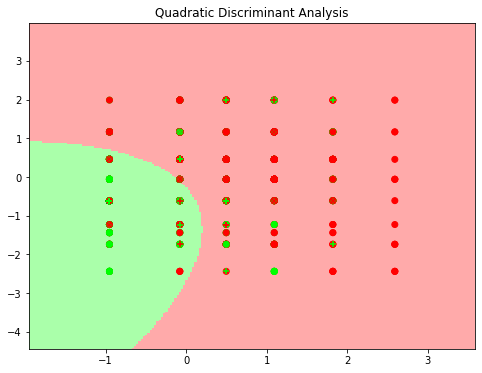

In [30]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
plot_cat_model(QDA, X, y)
plt.title ("Quadratic Discriminant Analysis")

In [31]:
X = np.array(druguser[ keep])
y = np.array(druguser[['Cannabis']]).reshape(-1)

Bootstrap(QDA, X, y)

                       train      test
47                  0.798408  0.838196
48                  0.794430  0.782493
49                  0.815650  0.779841
Mean                0.808130  0.796021
Standard Deviation  0.011589  0.024850


This reduced the overfitting, and has shown to be the best model for our data. The training/testing are VERY similar.

## Decision Trees

We decided to do Decision Tree because it is a very interpretable model, even though we didn't have high hopes that it would provide good results.

In [32]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier

Training Error: 0.7374005305039788
Testing Error: 0.7214854111405835


Text(0.5, 1.0, 'Decision Tree')

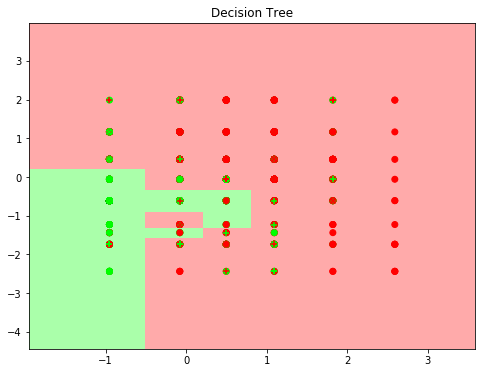

In [33]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

tree = DecisionTreeClassifier(min_samples_leaf=5)
plot_cat_model(tree, X, y)
plt.title ("Decision Tree")

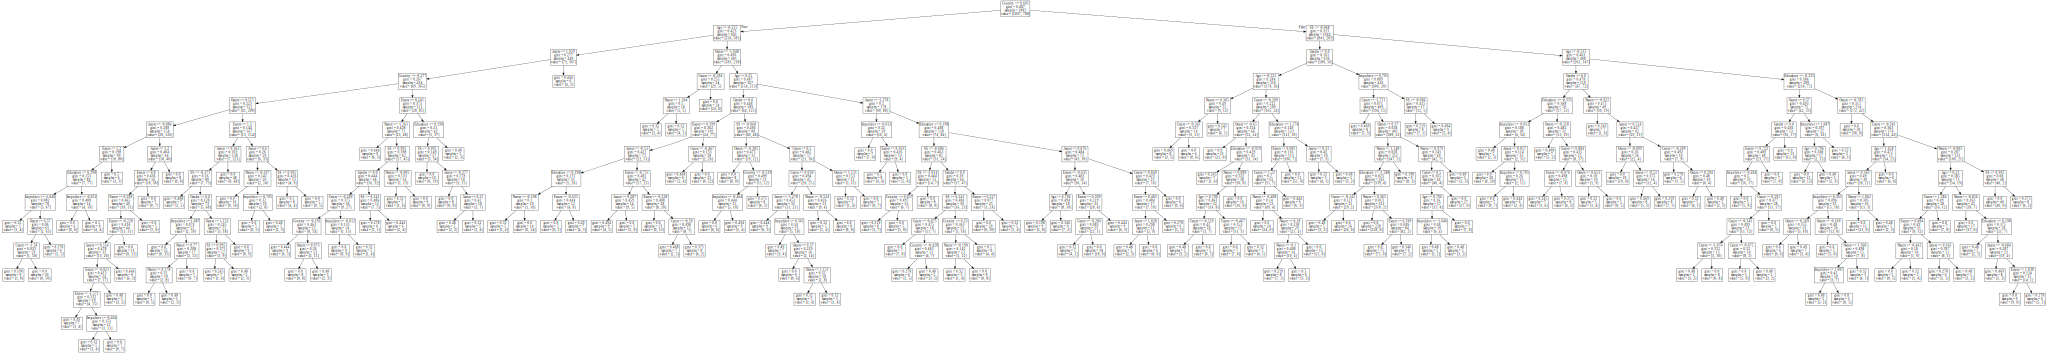

In [34]:
X = np.array(druguser[ keep])
y = np.array(druguser['Cannabis'])

tree.fit(X, y)

export_graphviz(tree, out_file='tree-3.dot', feature_names=keep)

with open('tree-3.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

In [35]:
Bootstrap(tree, X, y)

                       train      test
47                  0.915782  0.801061
48                  0.910477  0.824934
49                  0.926393  0.840849
Mean                0.918448  0.823926
Standard Deviation  0.005568  0.020899


The model is WAY overfitting the data!

Text(0.5, 1.0, 'Feature Importance Based on Decision Tree')

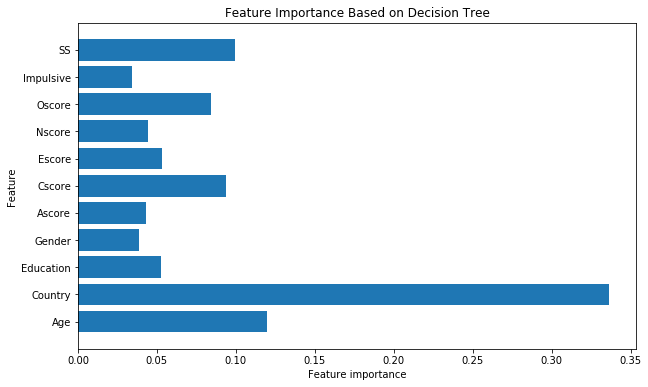

In [36]:
plot_feature_importances(tree, keep)
plt.title ("Feature Importance Based on Decision Tree")

We decided to implemenet an ensemble model to see if the two features we had been using were actually the highest weighted features. We were shocked to see that Country has a very high importance. We decided to use our entire keep because more features gets us more accurate information but less interpretable results (can't visualize it).

## Neural Network

Neural Networks is a very middle of the spectrum model that has similar flexibility/adjustability.

In [37]:
from sklearn.neural_network import MLPClassifier

v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float

Skynet = MLPClassifier(solver='lbfgs', hidden_layer_sizes = (10, 10, 10))

Training Error: 0.7327586206896551
Testing Error: 0.7506631299734748


Text(0.5, 1.0, 'Neural Networks')

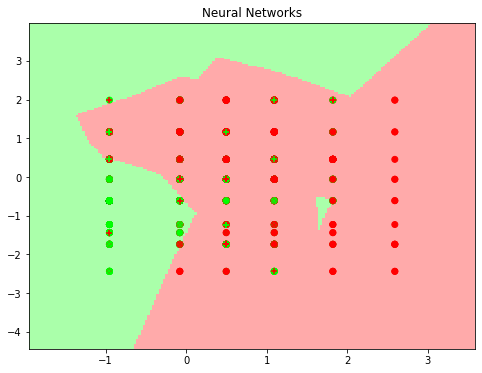

In [38]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

plot_cat_model(Skynet, X, y)
plt.title ("Neural Networks")

In [39]:
X = np.array(druguser[ keep])
y = np.array(druguser['Cannabis'])
Bootstrap(Skynet, X, y)

                       train      test
47                  0.933687  0.856764
48                  0.906499  0.814324
49                  0.921088  0.840849
Mean                0.922745  0.832785
Standard Deviation  0.044373  0.041031


This model overfit, but higher computing power could help show the optimal layer amounts to reduce this.

## Voting!

Voting helps combine a bunch of models to show which of the models has higher weights due to being more accurate.

In [40]:
from sklearn.ensemble import VotingClassifier

clf1 = KNeighborsClassifier(n_neighbors=19)
clf2 = DecisionTreeClassifier(min_samples_leaf=5)
clf3 = QuadraticDiscriminantAnalysis()
clf4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes = (10,10,10))



In [41]:
vclf = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),], 
                       voting='hard', 
                       weights = [1, 1, 1 , 1], 
                       n_jobs = -1)

Training Error: 0.7374005305039788
Testing Error: 0.753315649867374


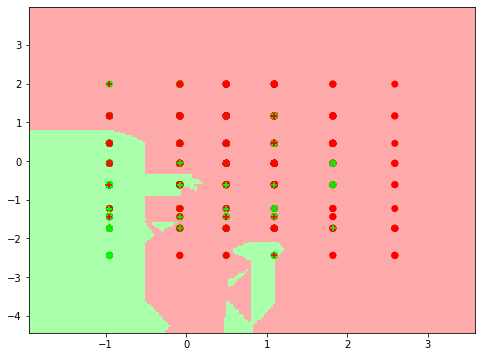

In [42]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)
plot_cat_model(vclf, X, y)


## Gridsearch

In [38]:
X = np.array(druguser[ keep])
y = np.array(druguser['Cannabis'])

from sklearn.model_selection import GridSearchCV
ww = np.linspace(0.1, 20, 5)
weight_space = [ [k1, k2, k3, k4] for k1 in ww for k2 in ww for k3 in ww for k4 in ww]
parameters = {'weights':weight_space}
reg = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),],
                     n_jobs = -1)
reg_grd = GridSearchCV(reg, parameters, cv=5, n_jobs=-1).fit(X, y)

In [39]:
print('Maximum Cross Validated Mean Score: {}'.format(reg_grd.cv_results_['mean_test_score'].max()))
print('Occurs for weights: {}'.format(reg_grd.cv_results_['params'][reg_grd.cv_results_['mean_test_score'].argmax()]['weights']))


Maximum Cross Validated Mean Score: 0.7973474801061008
Occurs for weights: [20.0, 0.1, 20.0, 5.074999999999999]


In [40]:
vclf2 = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),], 
                       voting='hard', 
                       weights = [20.0, 0.1, 20.0, 5.074999999999999], 
                       n_jobs = -1)

In [41]:
Bootstrap(vclf2, X, y)

                       train      test
47                  0.847480  0.843501
48                  0.850133  0.830239
49                  0.852122  0.832891
Mean                0.849085  0.817135
Standard Deviation  0.013612  0.018729


After performing a Grid Search, we determined the weights to apply for each model. The results have been inconsistent in what the actual weights to use are. A higher CPU with more cores would make this run a lot faster.

Both Quadratic and Voting proved to be great models! Quadratic proved to be the most effective model at answering our question for our data set. This model doesn't require a high computing power (like voting does), yet limits overfitting and is flexible. We created a pretty effective algorithm that can predict with about 80% accuracy who is a Cannabis User and who isn't.

# Next Project

This is an example of how we could perform a more in depth question with our data set. This is a great example of attempting to predict rare events by reducing overall sample size.

In [44]:
druguser.Cannabis = druguser.Cannabis.map(names)
Cannabisuser = druguser.loc[druguser.loc[:,"Cannabis"]==1,:]

In [45]:
Cannabisuser.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,CL0,CL2,CL0,0,CL3,0,1,0,CL0
11,12,1.09449,-0.48246,-0.61113,-0.28519,-0.31685,-1.32828,0.00332,0.14143,-1.92595,...,0,CL0,CL0,CL0,0,CL0,0,1,0,CL0
17,18,1.09449,-0.48246,-1.73790,0.96082,-0.31685,0.52135,-1.23177,-0.31776,-0.45321,...,0,CL0,CL2,CL0,0,CL0,0,1,0,CL0
27,28,0.49788,-0.48246,0.45468,0.96082,-0.31685,0.52135,-1.23177,-0.01928,-0.01729,...,0,CL0,CL0,CL2,0,CL0,0,0,0,CL0
48,49,1.09449,-0.48246,-1.73790,0.96082,-0.31685,0.13606,-0.80615,-0.31776,-0.15487,...,0,CL0,CL0,CL0,0,CL0,0,1,0,CL0


In [46]:
Cannabisuser.shape

(788, 32)

Training Error: 0.838351822503962
Testing Error: 0.8789808917197452


Text(0.5, 1.0, 'Neural Networks Based in Only Cannabis Users')

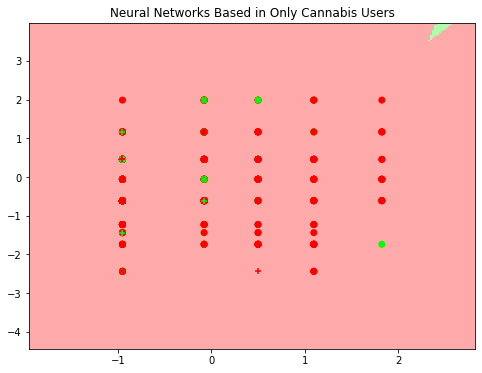

In [47]:
X = np.array(Cannabisuser[['Age','Education']])
y = np.array(Cannabisuser[['Coke']]).reshape(-1)

plot_cat_model(Skynet, X, y)
plt.title ("Neural Networks Based in Only Cannabis Users")

In [48]:
X = np.array(Cannabisuser[ keep])
y = np.array(Cannabisuser[['Coke']]).reshape(-1)

Bootstrap(vclf, X, y)

                       train      test
47                  0.871632  0.847134
48                  0.890650  0.866242
49                  0.890650  0.917197
Mean                0.892868  0.867261
Standard Deviation  0.014004  0.026610


In [49]:
reg = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),],
                     n_jobs = -1)
reg_grd = GridSearchCV(reg, parameters, cv=5, n_jobs=-1).fit(X, y)

NameError: name 'GridSearchCV' is not defined

In [57]:
print('Maximum Cross Validated Mean Score: {}'.format(reg_grd.cv_results_['mean_test_score'].max()))
print('Occurs for weights: {}'.format(reg_grd.cv_results_['params'][reg_grd.cv_results_['mean_test_score'].argmax()]['weights']))


Maximum Cross Validated Mean Score: 0.850253807106599
Occurs for weights: [15.024999999999999, 0.1, 15.024999999999999, 0.1]


In [58]:
vclf3 = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),], 
                       voting='hard', 
                       weights = [15.024999999999999, 0.1, 15.024999999999999, 0.1], 
                       n_jobs = -1)

In [59]:
Bootstrap(vclf3, X, y)

                       train      test
47                  0.895404  0.859873
48                  0.912837  0.891720
49                  0.906498  0.891720
Mean                0.891442  0.866752
Standard Deviation  0.012058  0.023310
